In [1]:
import json
from time import time
from glob import glob
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
from time import time

from utils import load_mch
from utils.mch import MCHHandler



In [2]:
args = {
    "skin":{
        "blood_volume_fraction": 0.5,
        "ScvO2": 0.7,
        "water_volume": 0.49,
        "fat_volume": 0,
        "melanin_volume": 0.01,
    },

    "fat":{
        "blood_volume_fraction": 0,
        "ScvO2": 0,
        "water_volume": 0,
        "fat_volume": 1,
        "melanin_volume": 0,
    },

    "muscle":{
        "blood_volume_fraction": 0.05,
        "ScvO2": 0.80,
        "water_volume": 0.75,
        "fat_volume": 0,
        "melanin_volume": 0,
    },
    "ijv":{
        "blood_volume_fraction": 1,
        "ScvO2": 0.80,
        "water_volume": 0,
        "fat_volume": 0,
        "melanin_volume": 0,
    },
    "cca":{
        "blood_volume_fraction": 1,
        "ScvO2": 0.80,
        "water_volume": 0,
        "fat_volume": 0,
        "melanin_volume": 0,
    },

}


In [18]:
mch = MCHHandler()
mch.quick_load_ijv("output/20190502_max/mcx_output")

start = time()
s, p = mch.run_wmc(args)
end = time()
run_one = [(end-start) * i for i in range(1, 101)]

In [19]:
run_multi = []
for i in range(1, 10):
    print(i, end="\r")
    start = time()
    s, p = mch.run_wmc([args] * i)
    end = time()
    run_multi += [end-start]

In [25]:
import torch
torch.cuda.is_available()

True

In [ ]:
start = time()
s, p = mch.run_wmc([args] * 1000)
end = time()
end - start

In [27]:
s.shape

(1000, 3, 27)

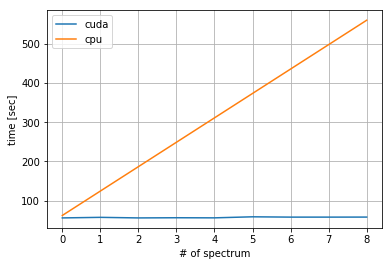

In [28]:
plt.figure(figsize=(6, 4))
i = 9
plt.plot(run_multi[:i], label="cuda")
plt.plot(run_one[:i], label="cpu")

plt.xlabel("# of spectrum")
plt.ylabel("time [sec]")
plt.legend()
plt.grid()
plt.show()

In [6]:
torch.rand(4,2) @ torch.rand(2, 3)

tensor([[0.2627, 0.2048, 0.1237],
        [0.8724, 0.7898, 0.6024],
        [0.6002, 0.6092, 0.5294],
        [0.6724, 0.5498, 0.3614]])

In [15]:
s.shape

(9, 3, 7)

In [16]:
p.shape

(9, 5, 7)

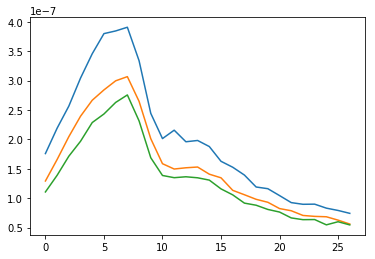

In [22]:

for i in range(3): plt.plot(s[0, i, :])